## Convert PDF File to Text

In [ ]:
# Import the library and package
import pandas as pd
import numpy as np
import requests
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Download and install the nltk data and packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
## Import or install PDF-to-text library
try:
    import PyPDF2
except:
    !pip install PyPDF2
    import PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
# List of PDF files from local folder
file_names = ['annual-report-2017-2018-eng.pdf', 'innovation_challenges_report_-_en_final_oct14.pdf', 'Innovation-for-a-better-Canada.pdf', 'bridging_the_gap_en.pdf']

In [ ]:
# Function to do data preprocessing including lemmatization
def data_preprocessing(text):
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    # Do the tokenization
    word_tokens = word_tokenize(text)
    # Do the lemmatization
    lemmatizer = WordNetLemmatizer()
    filteredlemmatized_text = [lemmatizer.lemmatize(word.lower()) for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filteredlemmatized_text)

In [ ]:
# Initialize a variable to hold the combined processed text from all PDFs
combined_processed_text = ""

# Loop through each PDF file, convert to text page-by-page, process text, and concatenate
for file_name in file_names:
    pdf_file_path = file_name
    pdf_file = open(pdf_file_path, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    paper_text = ""
    for page_num in range(len(pdf_reader.pages)):
        page_text = pdf_reader.pages[page_num].extract_text().lower()
        filtered_page_text = page_text
        paper_text += filtered_page_text + "\n\n"
    combined_processed_text += paper_text + "\n\n--- End of " + file_name + " ---\n\n"

## ChatGPT API for Paper Summarization and Text Generation

In [ ]:
# Import the package
try:
    import openai
except:
    !pip install openai
    import openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00


In [ ]:
## API Key
API_KEY= "KEY"

os.environ['OPENAI_API_KEY'] = API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

In [ ]:
# Select the ChatGPT model
model = "gpt-4-0125-preview"

In [ ]:
from openai import OpenAI
client = OpenAI()

### ChatGPT Prompt 1

In [ ]:
prompt1 = 'Here is the relevant transacript of a report which provides a comprehensive snapshot of the innovation ecosystem performance of 132 economies worldwide, tracking the latest global innovation trends. You need to analyze which factors (e.g., human capital, productivity, R&D spendings, research tax breaks, etc.) drive innovations, if the provied transacript not have those factors, give it by yourself: "{input}".'.format(input=combined_processed_text)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
prompt1[:min(len(prompt1),40000)]

'Here is the relevant transacript of a report which provides a comprehensive snapshot of the innovation ecosystem performance of 132 economies worldwide, tracking the latest global innovation trends. You need to analyze which factors (e.g., human capital, productivity, R&D spendings, research tax breaks, etc.) drive innovations, if the provied transacript not have those factors, give it by yourself: "canadian intellectual property office\nhelping make canada a global centre of innovation  \nannual report\n2017—2018\n\nce document est aussi disponible en français sous le titre rapport annuel 2017–2018 : office de la propriété \nintellectuelle du canada – contribuer à faire du canada un centre mondial de l’innovation.\nthis publication is available upon request in accessible formats.\ncontact\nclient service centre\ncanadian intellectual property office\ninnovation, science and economic development canada\nplace du portage i\nroom c229, 2nd floor\n50 victoria street\ngatineau, qc   k1a 0

In [ ]:
## Call OpenAI API for the first prompt
response1 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt1}
  ]
)

In [ ]:
coutput1 = response1.choices[0].message.content
print(coutput1)

Based on the provided texts, it's evident that various factors drive innovations across different sectors and nations. These factors can encompass a wide range of elements that collectively contribute to the overall performance of an innovation ecosystem. While the specific details from the provided documents are not directly cited here, drawing from a broader understanding of innovation systems, we can identify key factors typically involved. Here are some common elements that are likely to influence innovation:

1. **Human Capital**: The creativity, skills, and expertise of a workforce are crucial for innovation. Educated and skilled individuals can drive research and development (R&D) efforts, contributing significantly to creating new products, services, and processes.

2. **Research and Development (R&D) Spending**: Investment in R&D is a cornerstone of innovation. It fuels the exploration of new ideas, the development of new technologies, and the improvement of existing products 

### ChatGPT Prompt 2

In [ ]:
prompt2 = 'Based on this relevant transacript of a report, show which countries have a similar country type quite same to Canada, if the provied transacript not have this, give the countries by yourself, write in point of form: "{input}".'.format(input=combined_processed_text)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
prompt2[:min(len(prompt2),40000)]

'Based on this relevant transacript of a report, show which countries have a similar country type quite same to Canada, if the provied transacript not have this, give the countries by yourself, write in point of form: "canadian intellectual property office\nhelping make canada a global centre of innovation  \nannual report\n2017—2018\n\nce document est aussi disponible en français sous le titre rapport annuel 2017–2018 : office de la propriété \nintellectuelle du canada – contribuer à faire du canada un centre mondial de l’innovation.\nthis publication is available upon request in accessible formats.\ncontact\nclient service centre\ncanadian intellectual property office\ninnovation, science and economic development canada\nplace du portage i\nroom c229, 2nd floor\n50 victoria street\ngatineau, qc   k1a 0c9\nt elephone (toll-free): 1-866-997-1936 \ntty: 1-866-442-2476\nfax: 819-953-2476\nic.contact-contact.ic@canada.ca\nthis publication is also available online in html at www.cipo.gc.ca

In [ ]:
## Call OpenAI API for the second prompt
response2 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt2}
  ]
)

In [ ]:
coutput2 = response2.choices[0].message.content
print(coutput2)

Based on the contents of the provided documents concerning innovation in Canada, the countries with similar innovation and intellectual property emphasis as Canada include:

- **United States:** Noted as the top filing country at the Canadian Intellectual Property Office for patents, indicating a strong emphasis on innovation and protection of intellectual property, similar to Canada.
  
- **Germany:** Mentioned as both a significant filer of patents and having industrial designs registered in Canada, showing a comparable drive towards innovation and intellectual property protection.
  
- **Japan:** Highlighted for patents and industrial designs filings in Canada, reflecting a similar approach towards innovation.
  
- **United Kingdom:** Included in the list of filings for industrial designs in Canada, indicating an emphasis on innovation that mirrors Canada's.

Other countries like France and Singapore, while having lower numbers, still showed engagement with Canada's intellectual pro

### ChatGPT Prompt 3

In [ ]:
prompt3 = 'Based on this detailed analysis of factors which caused innovation, which factors can be critical to improve Canada’s position relative to United Kingdom and United States, you should choose the 4 factors from it: "{input}".'.format(input=coutput1)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
prompt3[:min(len(prompt3),40000)]

'Based on this detailed analysis of factors which caused innovation, which factors can be critical to improve Canada’s position relative to United Kingdom and United States, you should choose the 4 factors from it: "Based on the provided texts, it\'s evident that various factors drive innovations across different sectors and nations. These factors can encompass a wide range of elements that collectively contribute to the overall performance of an innovation ecosystem. While the specific details from the provided documents are not directly cited here, drawing from a broader understanding of innovation systems, we can identify key factors typically involved. Here are some common elements that are likely to influence innovation:\n\n1. **Human Capital**: The creativity, skills, and expertise of a workforce are crucial for innovation. Educated and skilled individuals can drive research and development (R&D) efforts, contributing significantly to creating new products, services, and processe

In [ ]:
## Call OpenAI API for the third prompt
response3 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt3}
  ]
)

In [ ]:
coutput3 = response3.choices[0].message.content
print(coutput3)

To improve Canada's position relative to the United Kingdom and the United States in terms of innovation, focusing on the following four factors could be particularly critical, given the diverse and competitive nature of the global innovation landscape:

1. **Human Capital**: Enhancing the creativity, skills, and expertise of Canada's workforce is paramount. Canada should invest more in education, vocational training, and lifelong learning programs to develop a highly skilled workforce capable of driving research, development, and innovation. Initiatives could include special scholarships for STEM (Science, Technology, Engineering, and Mathematics) fields, incentives for lifelong learning, and programs to attract top international talent.

2. **Research and Development (R&D) Spending**: Increasing investment in R&D is crucial for fostering innovation. Canada should aim to not only increase government expenditure on R&D but also encourage private sector investment through tax breaks, gr

### ChatGPT Prompt 4

In [ ]:
prompt4 = 'Based on these chosen factors to improve Canadian position relative to United Kingdom and United States, you should answer how Canada stands on those factors: "{input}".'.format(input=coutput3)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
prompt4[:min(len(prompt4),40000)]

'Based on these chosen factors to improve Canadian position relative to United Kingdom and United States, you should answer how Canada stands on those factors: "To improve Canada\'s position relative to the United Kingdom and the United States in terms of innovation, focusing on the following four factors could be particularly critical, given the diverse and competitive nature of the global innovation landscape:\n\n1. **Human Capital**: Enhancing the creativity, skills, and expertise of Canada\'s workforce is paramount. Canada should invest more in education, vocational training, and lifelong learning programs to develop a highly skilled workforce capable of driving research, development, and innovation. Initiatives could include special scholarships for STEM (Science, Technology, Engineering, and Mathematics) fields, incentives for lifelong learning, and programs to attract top international talent.\n\n2. **Research and Development (R&D) Spending**: Increasing investment in R&D is cru

In [ ]:
## Call OpenAI API for the fourth prompt
response4 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt4}
  ]
)

In [ ]:
coutput4 = response4.choices[0].message.content
print(coutput4)

To evaluate Canada's current standing and efforts towards improving its position relative to the United Kingdom and the United States in innovation by focusing on the aforementioned factors, let's break down Canada's situation in each area:

1. **Human Capital**:
   - Canada is recognized for its high quality of life and education system. It boasts one of the highest rates of tertiary education completion among OECD countries. The country also attracts international talent through immigration policies targeted at skilled workers, including those in STEM fields. However, ongoing investments and reforms in education, especially in promoting STEM education and vocational training, are crucial to maintaining and enhancing this position. Canada's approach to lifelong learning, re-skilling, and up-skilling of the existing workforce could further solidify its competitive edge in human capital.

2. **Research and Development (R&D) Spending**:
   - When it comes to R&D spending, Canada has a mi

### ChatGPT Prompt 5

In [ ]:
prompt5 = 'Based on this detailed analysis of Canadian performanceach sub-strategy corresponds e, you should design one strategy in total and separate it into four sub-strategys of this main strategy and to one factor (four in total), you should write the strategy to be very specific. For example, if you want to your strategy be targeted investment in emerging technologies, you should specify it in which kind of technology, like electrical cars or superconducting materials.: "{input}".'.format(input=coutput4)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
prompt5[:min(len(prompt5),40000)]

'Based on this detailed analysis of Canadian performance, you should design one strategy in total and separate it into four sub-strategys of this main strategy and each sub-strategy corresponds to one factor (four in total), you should write the strategy to be very specific. For example, if you want to your strategy be targeted investment in emerging technologies, you should specify it in which kind of technology, like electrical cars or superconducting materials.: "To evaluate Canada\'s current standing and efforts towards improving its position relative to the United Kingdom and the United States in innovation by focusing on the aforementioned factors, let\'s break down Canada\'s situation in each area:\n\n1. **Human Capital**:\n   - Canada is recognized for its high quality of life and education system. It boasts one of the highest rates of tertiary education completion among OECD countries. The country also attracts international talent through immigration policies targeted at skil

In [ ]:
## Call OpenAI API for the last prompt
response5 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt5}
  ]
)

In [ ]:
coutput5 = response5.choices[0].message.content
print(coutput5)

### **Comprehensive Strategy to Elevate Canada's Innovation Standing:**

To enhance Canada's position relative to the United Kingdom and the United States in the sphere of innovation, a multifaceted strategy is necessary. This strategy focuses on leveraging existing strengths while addressing areas requiring improvement across the four critical factors identified: Human Capital, R&D Spending, Collaboration Between Universities and Industry, and the Entrepreneurial Ecosystem. By specifying actions within each sub-strategy, Canada can create a conducive environment for innovation that not only matches but possibly exceeds those found in leading OECD countries.

#### **Sub-Strategy 1: Amplifying Human Capital Through Specialized STEM Initiatives**

- **Objective**: Strengthen Canada's human capital by tailoring education and vocational training towards the demands of future industries, specifically in the fields of artificial intelligence (AI), renewable energy technologies, and quantum c

In [ ]:
file_names = ['wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf']

In [ ]:
# Import the library and package
import pandas as pd
import numpy as np
import requests
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
## Import or install PDF-to-text library
try:
    import PyPDF2
except:
    !pip install PyPDF2
    import PyPDF2
# Import the package
try:
    import openai
except:
    !pip install openai
    import openai

In [ ]:
# Download and install the nltk data and packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\520sh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\520sh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\520sh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Function to do data preprocessing including lemmatization
def data_preprocessing(text):
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    # Do the tokenization
    word_tokens = word_tokenize(text)
    # Do the lemmatization
    lemmatizer = WordNetLemmatizer()
    filteredlemmatized_text = [lemmatizer.lemmatize(word.lower()) for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filteredlemmatized_text)

In [ ]:
# Initialize a variable to hold the combined processed text from all PDFs
combined_processed_text = ""

specific_pages = list(range(26, 30)) + [32] + list(range(34, 42))+list(range(224,247))

# Loop through each PDF file, convert to text page-by-page, process text, and concatenate
for file_name in file_names:
    pdf_file_path = file_name
    pdf_file = open(pdf_file_path, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    paper_text = ""
    for page_num in specific_pages:
        page_text = pdf_reader.pages[page_num].extract_text().lower()
        filtered_page_text = page_text
        paper_text += filtered_page_text + "\n\n"
    combined_processed_text += paper_text + "\n\n--- End of " + file_name + " ---\n\n"

In [ ]:
## API Key
API_KEY= "KEY"

os.environ['OPENAI_API_KEY'] = API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

In [ ]:
# Select the ChatGPT model
model = "gpt-4-0125-preview"

In [ ]:
from openai import OpenAI
client = OpenAI()

### ChatGPT Prompt Benchmark from INDEX REPORT

In [ ]:
country_prompt1 = 'Based on this relevant transacript of a report, show which countries have a similar country type quite same to Canada but higher innovation score, if the provied transacript not have this, give the countries by yourself, write in point of form: "{input}"'.format(input=combined_processed_text)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
country_prompt1[:min(len(prompt1),40000)]

'Based on this relevant transacript of a report, show which countries have a similar country type quite same to Canada but higher innovation score, if the provied transacript not have this, give the countries by yourself, write in point of form: "global innovation index 202328 in 2022, covid-19- and health-related research levelled out once again, with the number of \nscientific articles published not increasing noticeably between 2021 and 2022 (+1.5\xa0percent growth). \nas well as health, the fields of environmental and energy research are also continuing to grow. \nenvironmental sciences claimed second place in publications, with a solid 10.5\xa0percent growth on \n2022. publications in the energy and fuels field secured ninth spot, with a strong growth rate of \n13.2\xa0percent. the field of public, environmental and occupational health grew by 13.4\xa0percent from \n2021 to 2022 to rank in 10th position (having been stuck around 17th position prior to the pandemic). \nanother note

In [ ]:
## Call OpenAI API for the first prompt
response1 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": country_prompt1}
  ]
)

In [ ]:
country1 = response1.choices[0].message.content
print(country1)

Based on the detailed report that includes the Global Innovation Index (GII) rankings and various other metrics of innovation, if we are to identify countries with a similar country type to Canada but a higher innovation score, we would consider several factors including overall innovation index scores, strength in research and development (R&D), scientific and technical articles, quality of universities, and related indicators. Since the transcript does not provide the specific score or rank of Canada for direct comparison, I will identify countries traditionally recognized for their high levels of innovation, R&D investments, and quality of education, and which have consistently ranked high in the Global Innovation Index in recent years.

Considering these criteria, countries similar to Canada but with potentially higher innovation scores could include:

1. **Switzerland** - Frequently tops the Global Innovation Index, known for high investment in R&D and strong intellectual property

In [ ]:
factor_prompt1 = 'The report shows the development of innovative ecosystems in different countries and their innovation strategies, you need to analyze which factors (e.g., human capital, productivity, R&D spendings, research tax breaks, etc.)  drive innovation, give me a list of 10 factors: "{input}".'.format(input=combined_processed_text)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
factor_prompt1[:min(len(factor_prompt1),40000)]

'The report shows the development of innovative ecosystems in different countries and their innovation strategies, you need to analyze which factors (e.g., human capital, productivity, R&D spendings, research tax breaks, etc.)  drive innovation, give me a list of 10 factors: "global innovation index 202328 in 2022, covid-19- and health-related research levelled out once again, with the number of \nscientific articles published not increasing noticeably between 2021 and 2022 (+1.5\xa0percent growth). \nas well as health, the fields of environmental and energy research are also continuing to grow. \nenvironmental sciences claimed second place in publications, with a solid 10.5\xa0percent growth on \n2022. publications in the energy and fuels field secured ninth spot, with a strong growth rate of \n13.2\xa0percent. the field of public, environmental and occupational health grew by 13.4\xa0percent from \n2021 to 2022 to rank in 10th position (having been stuck around 17th position prior to

In [ ]:
## Call OpenAI API for the first prompt
response2 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": factor_prompt1}
  ]
)

In [ ]:
factor = response2.choices[0].message.content
print(factor)

Based on the comprehensive data provided, there are multiple factors driving innovation across different countries. Analyzing the Global Innovation Index 2023, COVID-19 research, R&D investments, and other key aspects highlighted across various segments, we can identify the following ten factors as significant drivers of innovation:

1. **Human Capital**: The quality, availability, and specialization of the workforce, particularly in STEM (Science, Technology, Engineering, Mathematics) fields, play a crucial role. Countries with strong education systems and skilled labor forces tend to lead in innovation.

2. **Research & Development (R&D) Expenditure**: The amount of spending on R&D, both by the government and the private sector, is a direct indicator of the commitment to innovation. Higher R&D expenditure often correlates with more significant innovation outcomes.

3. **Public-Private Collaboration**: Collaboration between universities, research institutions, and businesses facilitat

In [ ]:
factor_4_prompt = 'Based on this detailed analysis of factors which caused innovation, which factors can be critical to improve Canada’s position relative to United Kingdom and United States, you should choose the 4 factors from it: "{input}".'.format(input=factor)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
factor_4_prompt[:min(len(factor_4_prompt),40000)]

'Based on this detailed analysis of factors which caused innovation, which factors can be critical to improve Canada’s position relative to United Kingdom and United States, you should choose the 4 factors from it: "Based on the comprehensive data provided, there are multiple factors driving innovation across different countries. Analyzing the Global Innovation Index 2023, COVID-19 research, R&D investments, and other key aspects highlighted across various segments, we can identify the following ten factors as significant drivers of innovation:\n\n1. **Human Capital**: The quality, availability, and specialization of the workforce, particularly in STEM (Science, Technology, Engineering, Mathematics) fields, play a crucial role. Countries with strong education systems and skilled labor forces tend to lead in innovation.\n\n2. **Research & Development (R&D) Expenditure**: The amount of spending on R&D, both by the government and the private sector, is a direct indicator of the commitment

In [ ]:
## Call OpenAI API for the third prompt
response3 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": factor_4_prompt}
  ]
)

In [ ]:
factor4 = response3.choices[0].message.content
print(factor4)

To enhance Canada's position relative to that of the United Kingdom and the United States in terms of innovation, the four critical factors to focus on from the provided list would be:

1. **Research & Development (R&D) Expenditure**: Increasing R&D expenditure is foundational for driving innovation. Both the UK and US have strong R&D investments, so for Canada to compete or outpace, it would need to significantly boost its own R&D spending. This includes encouraging both governmental and private sector investment in R&D to foster innovation across various industries.

2. **Public-Private Collaboration**: Strengthening collaboration between academic institutions, government, and the private sector can accelerate the innovation process significantly. Canada has the potential to enhance its innovation ecosystems by fostering better linkages and synergy between these entities, learning from models that have proved successful in the UK and the US.

3. **Market Sophistication and Access to 

# IR system

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function for data preprocessing
def data_preprocessing(text):
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    # Do the tokenization
    word_tokens = word_tokenize(text)
    # Do the lemmatization
    lemmatizer = WordNetLemmatizer()
    filtered_lemmatized_text = [lemmatizer.lemmatize(word.lower()) for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filtered_lemmatized_text)

# Function to read text from a file and preprocess it
def read_and_preprocess(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    # Preprocessing steps
    preprocessed_text = data_preprocessing(text)
    return preprocessed_text

# Read and preprocess factors from the Global Innovation Index 2023 report
index_factors_preprocessed = read_and_preprocess('index10factors.txt')

# Read and preprocess factors from the collected dataset
factors_query_preprocessed = read_and_preprocess('pdf10factors.txt')

# Vectorize the preprocessed text using TF-IDF
vectorizer = TfidfVectorizer()
vectorized_your_factors = vectorizer.fit_transform([index_factors_preprocessed])

# Vectorize the preprocessed query using TF-IDF
vectorized_query = vectorizer.transform([factors_query_preprocessed])

# Calculate cosine similarity for 10 factors between two datasets
cosine_sim = cosine_similarity(vectorized_your_factors, vectorized_query)

print("Similarity Score for 10 factors:", cosine_sim[0][0])

Similarity Score for 10 factors: 0.7806091342039903


In [ ]:
# Read and preprocess the countries from the collected dataset
query_preprocessed = read_and_preprocess('pdfcountry.txt')

# Read and preprocess the countries from the Global Innovation Index 2023 report
factors_preprocessed = read_and_preprocess('indexcountry.txt')

# Vectorize the preprocessed text using TF-IDF
vectorizer = TfidfVectorizer()
vectorized_query = vectorizer.fit_transform([query_preprocessed])
vectorized_factors = vectorizer.transform([factors_preprocessed])

# Calculate cosine similarity for country between two datasets
cosine_sim = cosine_similarity(vectorized_query, vectorized_factors)

print("Similarity Score for country:", cosine_sim[0][0])

Similarity Score for country: 0.9354143466934856


In [ ]:
# Read and preprocess the 4 factors from the collected dataset
query_preprocessed = read_and_preprocess('pdf4factors.txt')

# Read and preprocess the 4 factors from the Global Innovation Index 2023 report
factors_preprocessed = read_and_preprocess('index4factors.txt')

# Vectorize the preprocessed text using TF-IDF
vectorizer = TfidfVectorizer()
vectorized_query = vectorizer.fit_transform([query_preprocessed])
vectorized_factors = vectorizer.transform([factors_preprocessed])

# Calculate cosine similarity for 4 key factors between two datasets
cosine_sim = cosine_similarity(vectorized_query, vectorized_factors)

print("Similarity Score for top 4 factors:", cosine_sim[0][0])

Similarity Score for top 4 factors: 0.7048507048510577


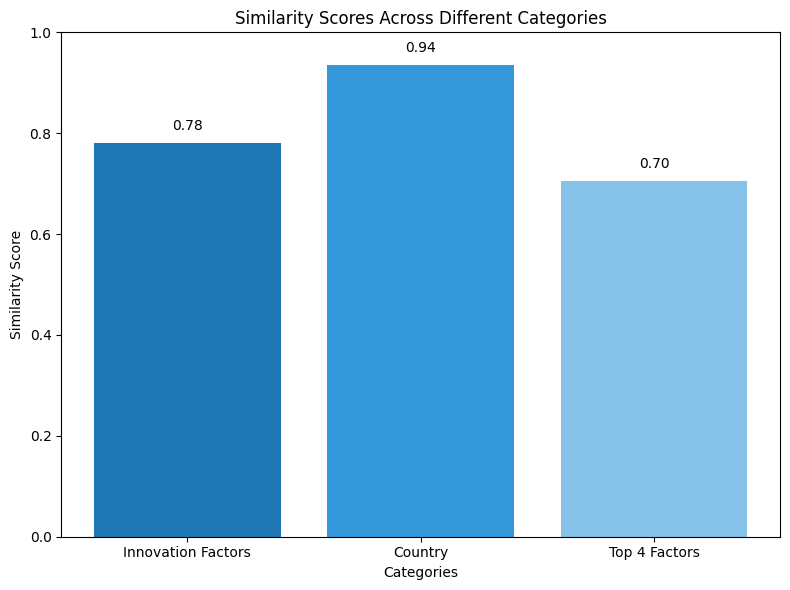

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Innovation Factors', 'Country', 'Top 4 Factors']
scores = [0.7806091342039903, 0.9354143466934856, 0.7048507048510577]
blue_shades = ['#1f77b4', '#3498db', '#85c1e9']  # Different shades of blue
# Creating the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, scores, color=blue_shades)
plt.xlabel('Categories')
plt.ylabel('Similarity Score')
plt.title('Similarity Scores Across Different Categories')
plt.ylim(0, 1)  # Limit y-axis to show scores from 0 to 1

# Adding text annotations above each bar
for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{score:.2f}", ha='center', va='bottom')

plt.tight_layout()

# Display the plot
plt.show()


## Line Chart of Score for UK and USA in 2019 to 2023

In [ ]:
# Import the package and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df_score = pd.read_csv("strategy_score.csv")

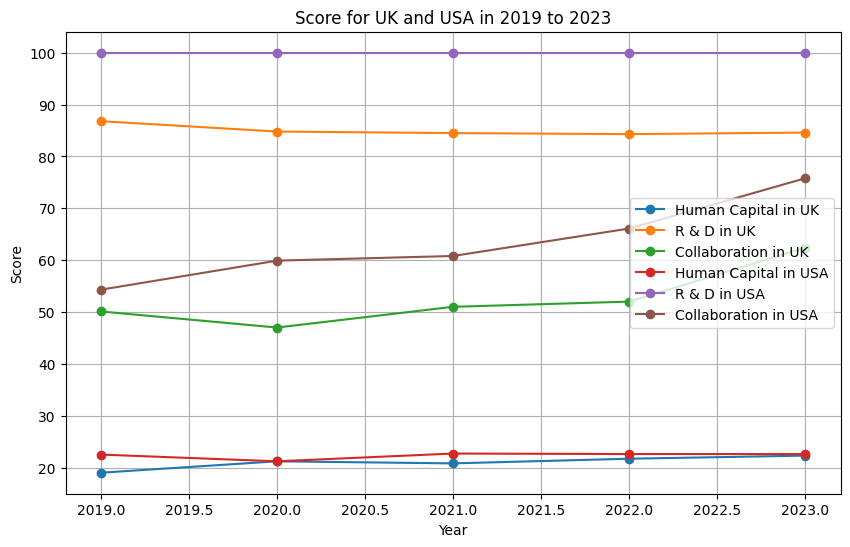

In [ ]:
# Define a mapping from original column names to new labels
score_columns = ['HC_UK', 'RD_UK', 'C_UK', 'HC_USA', 'RD_USA', 'C_USA']
new_labels = {
    'HC_UK': 'Human Capital in UK',
    'RD_UK': 'R & D in UK',
    'C_UK': 'Collaboration in UK',
    'HC_USA': 'Human Capital in USA',
    'RD_USA': 'R & D in USA',
    'C_USA': 'Collaboration in USA',
}

# Plotting each score with new labels
plt.figure(figsize=(10, 6))
for score_column in score_columns:
  plt.plot(df_score['Year'], df_score[score_column], marker='o', linestyle='-', label=new_labels[score_column])
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Score for UK and USA in 2019 to 2023')
plt.grid(True)
plt.legend()
plt.show()